In [2]:
import pandas as pd
from time import strftime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('raw_customer_retention.csv')

In [5]:
df.head()

,username,signup_date,ref_date,money,time,country
0,U10000,01/10/2019,01/10/2019,2,89,Canada
1,U10000,01/10/2019,07/10/2019,0,35,Canada
2,U10000,01/10/2019,09/10/2019,2,4,Canada
3,U10000,01/10/2019,10/10/2019,1,5,Canada
4,U10000,01/10/2019,12/10/2019,1,17,Canada


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 6 columns):
username       822 non-null object
signup_date    822 non-null object
ref_date       822 non-null object
money          822 non-null int64
time           822 non-null int64
country        822 non-null object
dtypes: int64(2), object(4)
memory usage: 38.6+ KB


In [9]:
# clean the data type
df.signup_date = pd.to_datetime(df.signup_date, format='%d/%m/%Y')
df.ref_date = pd.to_datetime(df.ref_date, format='%d/%m/%Y')

In [10]:
df.head()

,username,signup_date,ref_date,money,time,country
0,U10000,2019-10-01,2019-10-01,2,89,Canada
1,U10000,2019-10-01,2019-10-07,0,35,Canada
2,U10000,2019-10-01,2019-10-09,2,4,Canada
3,U10000,2019-10-01,2019-10-10,1,5,Canada
4,U10000,2019-10-01,2019-10-12,1,17,Canada


In [11]:
# create meaningful variable
df['seniority'] = (df['ref_date'] - df['signup_date']).dt.days + 1

In [12]:
df.head()

,username,signup_date,ref_date,money,time,country,seniority
0,U10000,2019-10-01,2019-10-01,2,89,Canada,1
1,U10000,2019-10-01,2019-10-07,0,35,Canada,7
2,U10000,2019-10-01,2019-10-09,2,4,Canada,9
3,U10000,2019-10-01,2019-10-10,1,5,Canada,10
4,U10000,2019-10-01,2019-10-12,1,17,Canada,12


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 7 columns):
username       822 non-null object
signup_date    822 non-null datetime64[ns]
ref_date       822 non-null datetime64[ns]
money          822 non-null int64
time           822 non-null int64
country        822 non-null object
seniority      822 non-null int64
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 45.0+ KB


In [30]:
# check for missing value
df.isna().values.sum()

0

In [18]:
# grouping customers
group = df.groupby(['signup_date', 'seniority'])

In [19]:
cohort_data = group['username'].size()

In [23]:
cohort_data.head(20)

signup_date  seniority
2019-10-01   1             9
             2             6
             3             5
             4             7
             5             6
             6             2
             7             2
             8             3
             9             3
             10            5
             11            2
             12            2
             13            4
             14            2
             15            3
2019-10-02   1            11
             2             7
             3             8
             4            11
             5             7
Name: username, dtype: int64

In [24]:
# create cohort with index
cohort_data = cohort_data.reset_index()
cohort_data

,signup_date,seniority,username
0,2019-10-01,1,9
1,2019-10-01,2,6
2,2019-10-01,3,5
3,2019-10-01,4,7
4,2019-10-01,5,6
5,2019-10-01,6,2
6,2019-10-01,7,2
7,2019-10-01,8,3
8,2019-10-01,9,3
9,2019-10-01,10,5


In [25]:
# create table with counts
cohort_counts = cohort_data.pivot(index='signup_date', 
                                  columns='seniority', 
                                  values='username')

In [26]:
cohort_counts

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
signup_date,,,,,,,,,,,,,,,
2019-10-01,9.0,6.0,5.0,7.0,6.0,2.0,2.0,3.0,3.0,5.0,2.0,2.0,4.0,2.0,3.0
2019-10-02,11.0,7.0,8.0,11.0,7.0,8.0,5.0,5.0,7.0,2.0,3.0,4.0,7.0,3.0,NaN
2019-10-03,11.0,9.0,9.0,6.0,10.0,4.0,6.0,4.0,4.0,3.0,3.0,2.0,2.0,NaN,NaN
2019-10-04,15.0,11.0,9.0,12.0,12.0,8.0,8.0,6.0,5.0,3.0,6.0,2.0,NaN,NaN,NaN
2019-10-05,12.0,9.0,11.0,8.0,11.0,9.0,4.0,6.0,5.0,8.0,3.0,NaN,NaN,NaN,NaN
2019-10-06,9.0,7.0,8.0,7.0,5.0,5.0,5.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN
2019-10-07,9.0,8.0,7.0,4.0,6.0,6.0,5.0,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,14.0,11.0,11.0,10.0,9.0,8.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,11.0,8.0,9.0,9.0,4.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# calculate retention along with row 
base = cohort_counts[1]
retention = cohort_counts.divide(base, axis=0).round(3)
retention

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
signup_date,,,,,,,,,,,,,,,
2019-10-01,1.0,0.667,0.556,0.778,0.667,0.222,0.222,0.333,0.333,0.556,0.222,0.222,0.444,0.222,0.333
2019-10-02,1.0,0.636,0.727,1.000,0.636,0.727,0.455,0.455,0.636,0.182,0.273,0.364,0.636,0.273,NaN
2019-10-03,1.0,0.818,0.818,0.545,0.909,0.364,0.545,0.364,0.364,0.273,0.273,0.182,0.182,NaN,NaN
2019-10-04,1.0,0.733,0.600,0.800,0.800,0.533,0.533,0.400,0.333,0.200,0.400,0.133,NaN,NaN,NaN
2019-10-05,1.0,0.750,0.917,0.667,0.917,0.750,0.333,0.500,0.417,0.667,0.250,NaN,NaN,NaN,NaN
2019-10-06,1.0,0.778,0.889,0.778,0.556,0.556,0.556,0.111,0.333,0.333,NaN,NaN,NaN,NaN,NaN
2019-10-07,1.0,0.889,0.778,0.444,0.667,0.667,0.556,0.667,0.444,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,1.0,0.786,0.786,0.714,0.643,0.571,0.429,0.429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1.0,0.727,0.818,0.818,0.364,0.636,0.545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


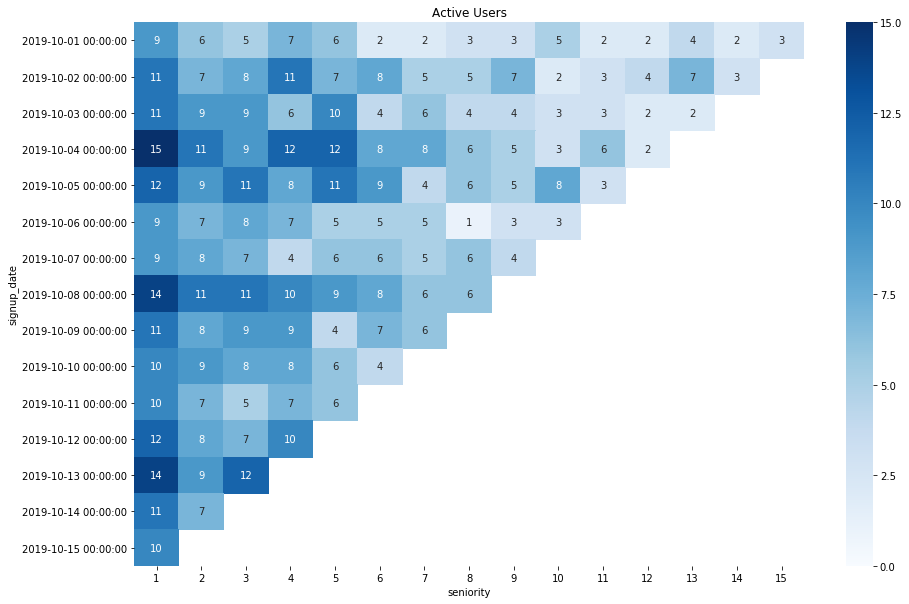

In [37]:
# plotting
plt.figure(figsize=(15,10))
plt.title('Active Users')
ax = sns.heatmap(data=cohort_counts, annot=True, vmin=0.0,cmap='Blues')
ax.set_yticklabels(cohort_counts.index)
fig=ax.get_figure()
fig.savefig("Retention Counts.png")

plt.show()

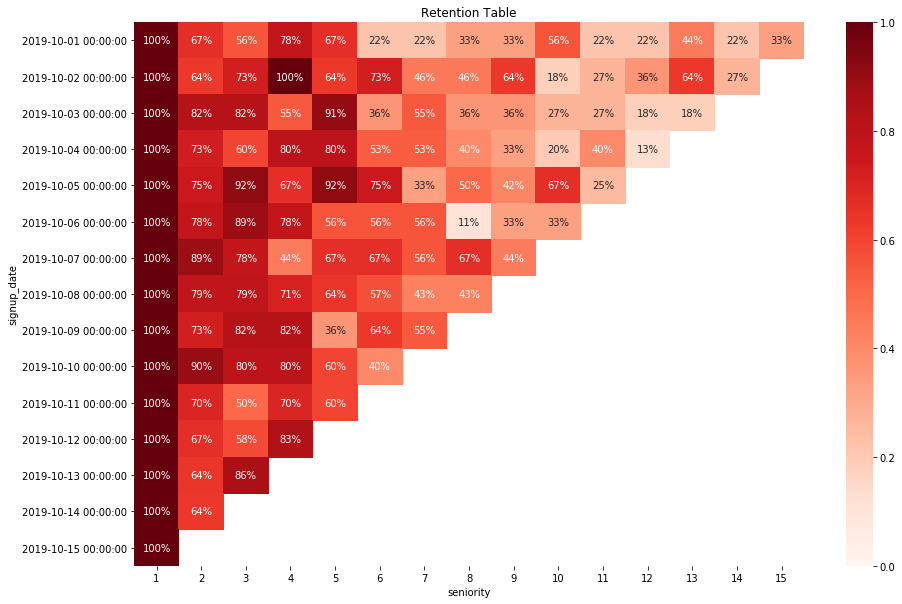

In [41]:
plt.figure(figsize=(15,10))
plt.title('Retention Table')
ax = sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
ax.set_yticklabels(retention.index)
fig=ax.get_figure()
fig.savefig("Retention_Rate.png")

plt.show()

In [42]:
# can also filtering by other columns, such as country
usa = df[df.country=='United States']
usa

,username,signup_date,ref_date,money,time,country,seniority
12,U10002,2019-10-01,2019-10-01,0,110,United States,1
13,U10002,2019-10-01,2019-10-04,1,51,United States,4
14,U10002,2019-10-01,2019-10-11,1,81,United States,11
15,U10002,2019-10-01,2019-10-12,0,21,United States,12
16,U10003,2019-10-01,2019-10-01,2,112,United States,1
17,U10003,2019-10-01,2019-10-02,1,25,United States,2
18,U10003,2019-10-01,2019-10-03,1,12,United States,3
19,U10003,2019-10-01,2019-10-04,1,137,United States,4
20,U10003,2019-10-01,2019-10-05,1,109,United States,5
21,U10003,2019-10-01,2019-10-06,0,97,United States,6


In [46]:
# same steps as above
grouping = usa.groupby(['signup_date', 'seniority'])
cohort_data_usa = grouping['username'].apply(pd.Series.nunique)
cohort_data_usa = cohort_data.reset_index()
cohort_counts_usa = cohort_data_usa.pivot(index='signup_date', columns='seniority', values='username')
retention_usa = cohort_counts_usa.divide(cohort_counts[1], axis=0).round(3)

In [47]:
retention_usa

seniority,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
signup_date,,,,,,,,,,,,,,,
2019-10-01,1.0,0.667,0.667,1.000,0.667,0.333,NaN,0.333,NaN,0.333,0.333,0.333,0.333,0.333,0.333
2019-10-02,1.0,0.500,1.000,1.000,1.000,0.500,NaN,NaN,1.0,NaN,NaN,NaN,0.500,0.500,NaN
2019-10-03,1.0,1.000,0.500,0.500,1.000,0.500,NaN,NaN,NaN,0.500,NaN,NaN,0.500,NaN,NaN
2019-10-04,1.0,NaN,NaN,1.000,1.000,NaN,1.0,1.000,NaN,NaN,1.000,NaN,NaN,NaN,NaN
2019-10-05,1.0,0.500,1.000,1.000,1.000,1.000,NaN,0.500,0.5,0.500,0.500,NaN,NaN,NaN,NaN
2019-10-06,1.0,1.000,1.000,0.667,0.333,0.333,1.0,0.333,NaN,0.667,NaN,NaN,NaN,NaN,NaN
2019-10-07,1.0,1.000,1.000,1.000,NaN,1.000,NaN,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-08,1.0,0.800,0.800,0.800,0.600,0.200,0.2,0.600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-09,1.0,1.000,1.000,1.000,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


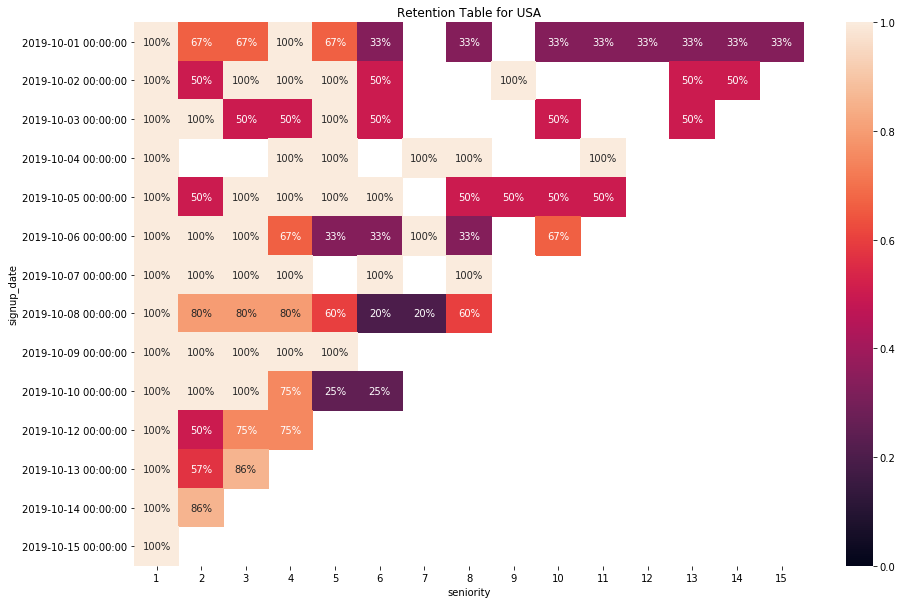

In [48]:
plt.figure(figsize=(15,10))
plt.title('Retention Table for USA')
ax = sns.heatmap(data=retention_usa, annot=True, fmt='.0%', vmin=0.0, vmax=1)
ax.set_yticklabels(retention_usa.index)
fig=ax.get_figure()
fig.savefig("Retention_Rate_usa.png")

plt.show()